## Importing libraries

In [9]:
from load_covid_data import load_covid_data
import numpy as np
from sklearn.neural_network import MLPClassifier, MLPRegressor
from accuracy_score import accuracy_score
from sklearn.model_selection import train_test_split
from GridSearch import *
import pandas as pd
from mean_square_error import MSE
from sklearn.utils import shuffle


## Loading covid dataset

In [10]:

# Loading covid dataset
headers, X, Y = load_covid_data()
X, Y = shuffle(X,Y) #Need to shuffle data to make it more random


M = 10000 #chosen number of data points
n = len(Y)
m = int(n/M)
random_index = np.random.randint(m)*M   
new_X = X[random_index:random_index+M]
new_Y = Y[random_index:random_index+M]


X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size = 0.25)

## Creating a MLP classifier with relu activation function

In [11]:
layers = [18,15,12,8]
model = MLPClassifier(hidden_layer_sizes=layers, activation="relu", max_iter=500, alpha=1.0,)
model.fit(X_train, Y_train)

MLPClassifier(alpha=1.0, hidden_layer_sizes=[18, 15, 12, 8], max_iter=500)

## Calculating accuracy score for the model

In [12]:
Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))

[[2291  124]
 [  35   50]]
0.9364


## Grid searching MLP hyperparameters momentum and alpha with the relu activation function

alpha:1e-05, momentum :1e-06 gives accuracy 0.9368
alpha:1e-05, momentum :1e-05 gives accuracy 0.95
alpha:1e-05, momentum :0.0001 gives accuracy 0.938
alpha:1e-05, momentum :0.001 gives accuracy 0.9324
alpha:1e-05, momentum :0.01 gives accuracy 0.9456
alpha:1e-05, momentum :0.1 gives accuracy 0.948
alpha:1e-05, momentum :1.0 gives accuracy 0.9344
alpha:0.0001, momentum :1e-06 gives accuracy 0.9528
alpha:0.0001, momentum :1e-05 gives accuracy 0.9372
alpha:0.0001, momentum :0.0001 gives accuracy 0.952
alpha:0.0001, momentum :0.001 gives accuracy 0.9408
alpha:0.0001, momentum :0.01 gives accuracy 0.9456
alpha:0.0001, momentum :0.1 gives accuracy 0.948
alpha:0.0001, momentum :1.0 gives accuracy 0.9344
alpha:0.001, momentum :1e-06 gives accuracy 0.9396
alpha:0.001, momentum :1e-05 gives accuracy 0.948
alpha:0.001, momentum :0.0001 gives accuracy 0.9504
alpha:0.001, momentum :0.001 gives accuracy 0.9404
alpha:0.001, momentum :0.01 gives accuracy 0.9356
alpha:0.001, momentum :0.1 gives accura

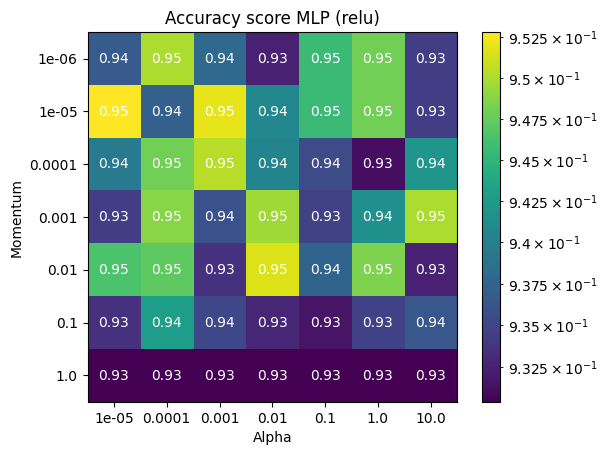

In [13]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (relu)", func="relu", verbose=True)

## Grid searching MLP hyperparameters momentum and alpha with the logistic activation function

alpha:1e-05, momentum :1e-06 gives accuracy 0.9524
alpha:1e-05, momentum :1e-05 gives accuracy 0.9512
alpha:1e-05, momentum :0.0001 gives accuracy 0.9556
alpha:1e-05, momentum :0.001 gives accuracy 0.9492
alpha:1e-05, momentum :0.01 gives accuracy 0.952
alpha:1e-05, momentum :0.1 gives accuracy 0.9504
alpha:1e-05, momentum :1.0 gives accuracy 0.952
alpha:0.0001, momentum :1e-06 gives accuracy 0.9504
alpha:0.0001, momentum :1e-05 gives accuracy 0.9528
alpha:0.0001, momentum :0.0001 gives accuracy 0.95
alpha:0.0001, momentum :0.001 gives accuracy 0.9524
alpha:0.0001, momentum :0.01 gives accuracy 0.948
alpha:0.0001, momentum :0.1 gives accuracy 0.9524
alpha:0.0001, momentum :1.0 gives accuracy 0.952
alpha:0.001, momentum :1e-06 gives accuracy 0.9532
alpha:0.001, momentum :1e-05 gives accuracy 0.9504
alpha:0.001, momentum :0.0001 gives accuracy 0.9552
alpha:0.001, momentum :0.001 gives accuracy 0.9528
alpha:0.001, momentum :0.01 gives accuracy 0.9532
alpha:0.001, momentum :0.1 gives accur

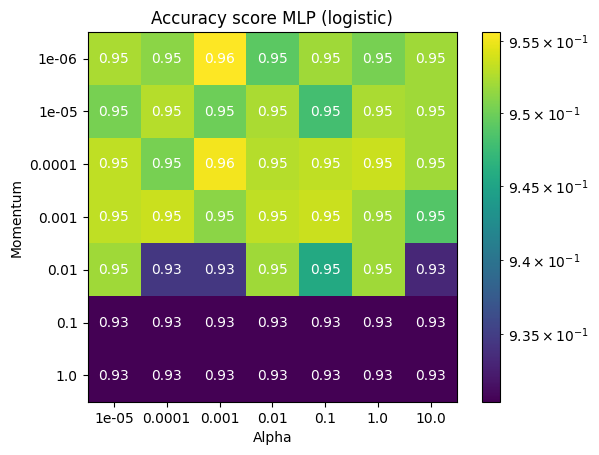

In [14]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (logistic)", func="logistic", verbose=True)

## Grid searching MLP hyperparameters momentum and alpha with the tanh activation function

alpha:1e-05, momentum :1e-06 gives accuracy 0.948
alpha:1e-05, momentum :1e-05 gives accuracy 0.9472
alpha:1e-05, momentum :0.0001 gives accuracy 0.95
alpha:1e-05, momentum :0.001 gives accuracy 0.9492
alpha:1e-05, momentum :0.01 gives accuracy 0.93
alpha:1e-05, momentum :0.1 gives accuracy 0.9328
alpha:1e-05, momentum :1.0 gives accuracy 0.952
alpha:0.0001, momentum :1e-06 gives accuracy 0.9492
alpha:0.0001, momentum :1e-05 gives accuracy 0.9428
alpha:0.0001, momentum :0.0001 gives accuracy 0.9532
alpha:0.0001, momentum :0.001 gives accuracy 0.9476
alpha:0.0001, momentum :0.01 gives accuracy 0.9484
alpha:0.0001, momentum :0.1 gives accuracy 0.9436
alpha:0.0001, momentum :1.0 gives accuracy 0.9388
alpha:0.001, momentum :1e-06 gives accuracy 0.9512
alpha:0.001, momentum :1e-05 gives accuracy 0.9452
alpha:0.001, momentum :0.0001 gives accuracy 0.9488
alpha:0.001, momentum :0.001 gives accuracy 0.9512
alpha:0.001, momentum :0.01 gives accuracy 0.946
alpha:0.001, momentum :0.1 gives accura

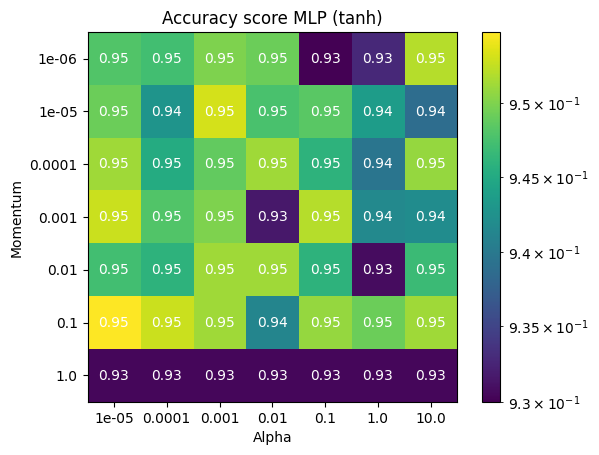

In [15]:
grid_search_hyperparameters_MLP(X_train, X_test, Y_train, Y_test, "Accuracy score MLP (tanh)", func="tanh", verbose=True)


## Calculating the f1 score for the MLP classifier with relu, logistic and tanh activation function

In [16]:
from sklearn.metrics import f1_score

model = MLPClassifier(activation="relu", max_iter=10000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))
print("f1 score:",f1_score(Y_pred, Y_test))

model = MLPClassifier(activation="logistic", max_iter=10000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))
print("f1 score:",f1_score(Y_pred, Y_test))


model = MLPClassifier(activation="tanh", max_iter=10000)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_pred, Y_test))
print("f1 score:",f1_score(Y_pred, Y_test))



[[2314  131]
 [  12   43]]
0.9428
f1 score: 0.3755458515283843
[[2315  106]
 [  11   68]]
0.9532
f1 score: 0.5375494071146245
[[2266   71]
 [  60  103]]
0.9476
f1 score: 0.6112759643916914


Looking at the models f1-score, we see that accuracy is not enough to do a good prediction, we therefore look closer at 
the f1-scores.

## Grid searching f1 score with hyperparameters momentum and alpha for MLP. Using activation function tanh

alpha:1e-05, momentum :1e-06 gives f1 score 0.5579710144927537
alpha:1e-05, momentum :1e-05 gives f1 score 0.4879518072289156
alpha:1e-05, momentum :0.0001 gives f1 score 0.5378787878787878
alpha:1e-05, momentum :0.001 gives f1 score 0.4747081712062257
alpha:1e-05, momentum :0.01 gives f1 score 0.5250965250965252
alpha:1e-05, momentum :0.1 gives f1 score 0.6081504702194357
alpha:1e-05, momentum :1.0 gives f1 score 0.5099601593625498
alpha:0.0001, momentum :1e-06 gives f1 score 0.44628099173553715
alpha:0.0001, momentum :1e-05 gives f1 score 0.5093167701863355
alpha:0.0001, momentum :0.0001 gives f1 score 0.3986254295532646
alpha:0.0001, momentum :0.001 gives f1 score 0.5522388059701493
alpha:0.0001, momentum :0.01 gives f1 score 0.5507246376811594
alpha:0.0001, momentum :0.1 gives f1 score 0.4980842911877395
alpha:0.0001, momentum :1.0 gives f1 score 0.5907473309608541
alpha:0.001, momentum :1e-06 gives f1 score 0.510948905109489
alpha:0.001, momentum :1e-05 gives f1 score 0.4135021097

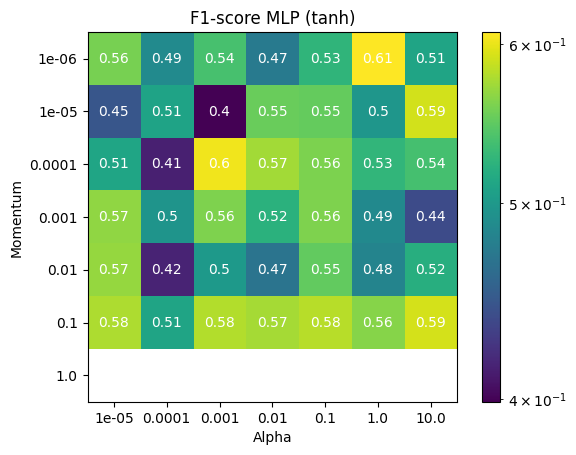

In [17]:
grid_search_hyperparameters_MLP_F1(X_train, X_test, Y_train, Y_test, "F1-score MLP (tanh)", func="tanh", verbose=True)


## Grid searching f1 score with hyperparameters momentum and alpha for MLP. Using activation function relu

alpha:1e-05, momentum :1e-06 gives f1 score 0.40888888888888897
alpha:1e-05, momentum :1e-05 gives f1 score 0.49218750000000006
alpha:1e-05, momentum :0.0001 gives f1 score 0.48995983935742976
alpha:1e-05, momentum :0.001 gives f1 score 0.5754189944134078
alpha:1e-05, momentum :0.01 gives f1 score 0.40145985401459855
alpha:1e-05, momentum :0.1 gives f1 score 0.42647058823529416
alpha:1e-05, momentum :1.0 gives f1 score 0.37992831541218636
alpha:0.0001, momentum :1e-06 gives f1 score 0.44966442953020136
alpha:0.0001, momentum :1e-05 gives f1 score 0.44255319148936173
alpha:0.0001, momentum :0.0001 gives f1 score 0.5559322033898305
alpha:0.0001, momentum :0.001 gives f1 score 0.5415162454873647
alpha:0.0001, momentum :0.01 gives f1 score 0.5416666666666667
alpha:0.0001, momentum :0.1 gives f1 score 0.55
alpha:0.0001, momentum :1.0 gives f1 score 0.5035971223021583
alpha:0.001, momentum :1e-06 gives f1 score 0.5714285714285714
alpha:0.001, momentum :1e-05 gives f1 score 0.5094339622641509

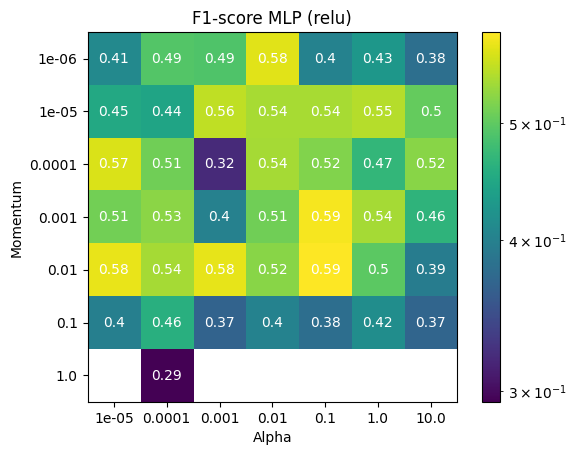

In [18]:
grid_search_hyperparameters_MLP_F1(X_train, X_test, Y_train, Y_test, "F1-score MLP (relu)", func="relu", verbose=True)


## Grid searching f1 score with hyperparameters momentum and alpha for MLP. Using activation function logistic

alpha:1e-05, momentum :1e-06 gives f1 score 0.5878136200716847
alpha:1e-05, momentum :1e-05 gives f1 score 0.5774647887323943
alpha:1e-05, momentum :0.0001 gives f1 score 0.5514705882352942
alpha:1e-05, momentum :0.001 gives f1 score 0.5777777777777777
alpha:1e-05, momentum :0.01 gives f1 score 0.6081081081081081
alpha:1e-05, momentum :0.1 gives f1 score 0.5804195804195803
alpha:1e-05, momentum :1.0 gives f1 score 0.583941605839416
alpha:0.0001, momentum :1e-06 gives f1 score 0.5936395759717314
alpha:0.0001, momentum :1e-05 gives f1 score 0.40293040293040294
alpha:0.0001, momentum :0.0001 gives f1 score 0.5735294117647058
alpha:0.0001, momentum :0.001 gives f1 score 0.6040268456375839
alpha:0.0001, momentum :0.01 gives f1 score 0.5755395683453237
alpha:0.0001, momentum :0.1 gives f1 score 0.5833333333333334
alpha:0.0001, momentum :1.0 gives f1 score 0.5746268656716418
alpha:0.001, momentum :1e-06 gives f1 score 0.5824561403508772
alpha:0.001, momentum :1e-05 gives f1 score 0.5962732919

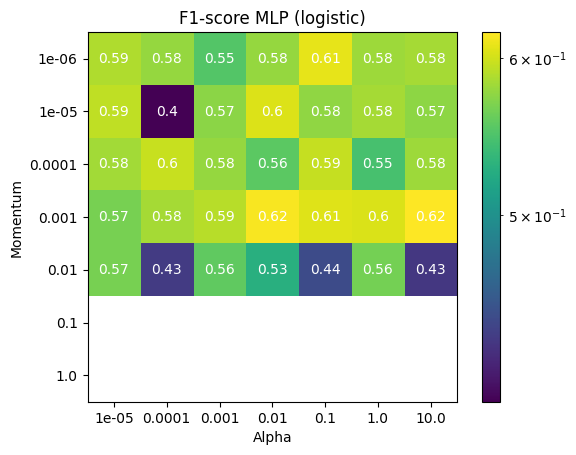

In [19]:
grid_search_hyperparameters_MLP_F1(X_train, X_test, Y_train, Y_test, "F1-score MLP (logistic)", func="logistic", verbose=True)


## Plotting f1 score over sample size for relu, logistic and tanh activation functions

0
1
2
3
4
5
6


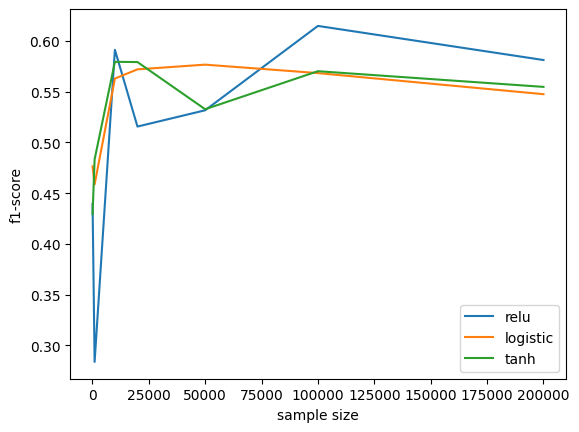

In [20]:
M_list = [100,1000,10000,20000,50000,100000,200000]
length = len(M_list)
tanh_arr = np.zeros(length)
relu_arr = np.zeros(length)
logistic_arr = np.zeros(length)

for i,M in enumerate(M_list):
    print(i)
    n = len(Y)
    m = int(n/M)
    random_index = np.random.randint(m)*M   
    new_X = X[random_index:random_index+M]
    new_Y = Y[random_index:random_index+M]

    model = MLPClassifier(activation="tanh", max_iter=10000)
    model.fit(new_X, new_Y)
    Y_pred = model.predict(X)
    acc = f1_score(Y_pred, Y)
    tanh_arr[i] = acc

    model = MLPClassifier(activation="logistic", max_iter=10000)
    model.fit(new_X, new_Y)
    Y_pred = model.predict(X)
    acc = f1_score(Y_pred, Y)
    logistic_arr[i] = acc

    model = MLPClassifier(activation="relu", max_iter=10000)
    model.fit(new_X, new_Y)
    Y_pred = model.predict(X)
    acc = f1_score(Y_pred, Y)
    relu_arr[i] = acc

plt.plot(M_list, relu_arr, label="relu")
plt.plot(M_list, logistic_arr, label="logistic")
plt.plot(M_list, tanh_arr, label="tanh")
plt.ylabel("f1-score")
plt.xlabel("sample size")
plt.legend()
plt.savefig("../figures/f1_scores")

## Training a random forest classifier and calculating accuracy score and f1 score

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
#Testing random forest for the whole data set first
forest = RandomForestClassifier(random_state=1)
forest.fit(X, Y)

RandomForestClassifier(random_state=1)

In [23]:
Y_pred = forest.predict(X)
print(accuracy_score(Y, Y_pred))
print(f1_score(Y,Y_pred))
print("predicted chance of dying:",np.sum(Y_pred)/len(Y_pred))
print("Actual chance of dying:",np.sum(Y)/len(Y))


[[963867   7766]
 [ 18304  58638]]
0.9751376868607395
0.8181323510945544
predicted chance of dying: 0.0633278497007844
Actual chance of dying: 0.07337767923133777


## Plotting feature importances using Random Forest Classifier

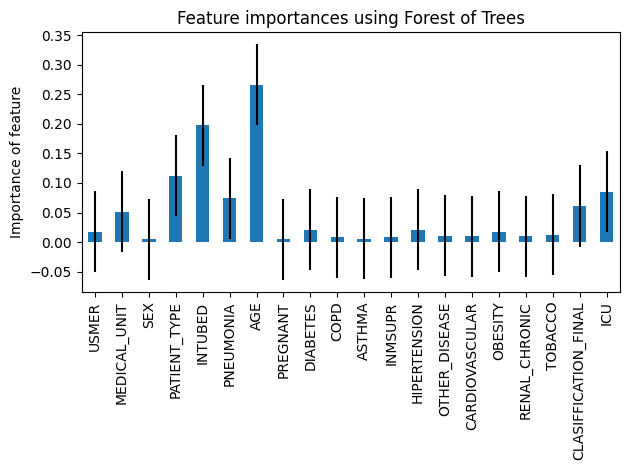

In [24]:
importances = forest.feature_importances_
std = np.std(importances)
forest_importances = pd.Series(importances, index=headers)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Forest of Trees")
ax.set_ylabel("Importance of feature")
fig.tight_layout()
plt.savefig("../figures/Feature_importance.png")

Here we see the most important features are medical_unit, patient_type, intubed, pneumonia, Age, classification_final and icu.

## Plotting f1 score over sample size using random forest classifier

0
1
2
3
4
5
6


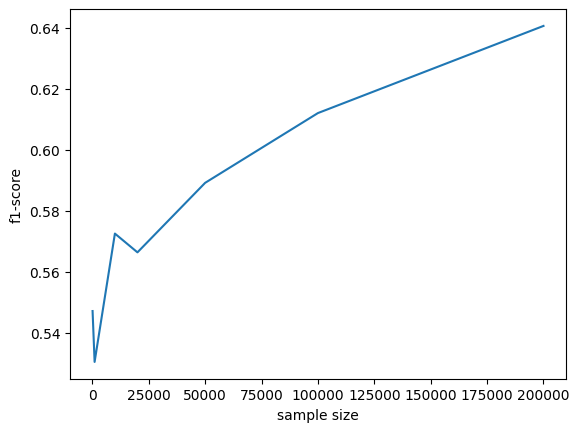

In [25]:
forest_arr = np.zeros(len(M_list))
for i,M in enumerate(M_list):
    print(i)
    n = len(Y)
    m = int(n/M)
    random_index = np.random.randint(m)*M   
    new_X = X[random_index:random_index+M]
    new_Y = Y[random_index:random_index+M]

    forest.fit(new_X, new_Y)
    Y_pred = forest.predict(X)
    acc = f1_score(Y, Y_pred)
    forest_arr[i] = acc

plt.plot(M_list, forest_arr)
plt.xlabel("sample size")
plt.ylabel("f1-score")
plt.savefig("../figures/f1_score_forest")

We now want to study the most important feature, which forest of trees told us was age. 

## Histogram of amount of deaths given a certain age

Text(0.5, 0, 'Age')

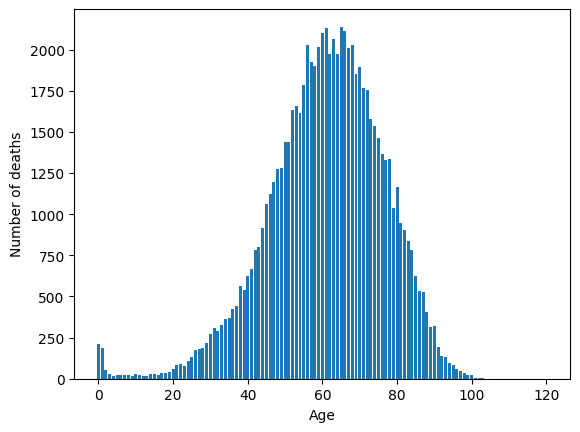

In [26]:
headers, X, Y = load_covid_data()
X,Y = shuffle(X,Y)

Age = X[:,6]
deaths = {i:0 for i in np.unique(Age)}
for i in range(len(Y)):
    deaths[Age[i]] += Y[i]

plt.bar(range(len(deaths)), list(deaths.values()))
plt.ylabel("Number of deaths")
plt.xlabel("Age")

## Histogram of chance of dying given a certain age

Text(0.5, 0, 'Age')

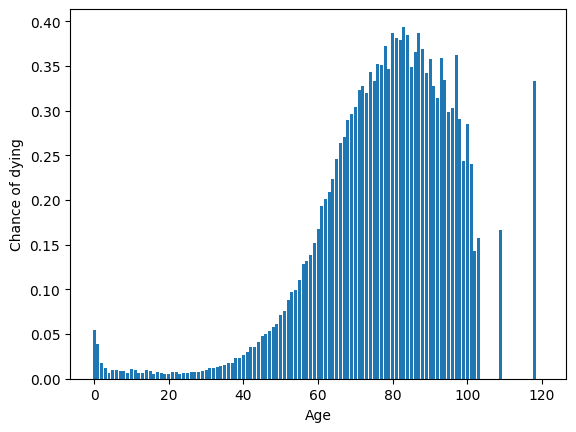

In [27]:
chance_dying = deaths.copy()
amount = {i:0 for i in np.unique(Age)}

for i in range(len(Y)):
    amount[Age[i]] += 1

for key in chance_dying:
    chance_dying[key] /= amount[key]

plt.bar(range(len(chance_dying)), list(chance_dying.values()))
plt.ylabel("Chance of dying")
plt.xlabel("Age")


## Looking into chance of dying based on age with both MLP and RandomForest classifier

In [28]:
Age_train = X_train[:,6].reshape(-1,1)
Age_test = X_test[:,6].reshape(-1,1)

model = MLPClassifier(activation="logistic", max_iter=10000)
model.fit(Age_train, Y_train)
YA_pred = model.predict(Age_test)
print(accuracy_score(YA_pred, Y_test))
print(f1_score(YA_pred, Y_test))



[[2325  173]
 [   1    1]]
0.9304
0.011363636363636362


In [29]:
forestAge = RandomForestClassifier(random_state=1)
forestAge.fit(Age_train, Y_train)
pred = forestAge.predict(Age_test)
accuracy_score(pred, Y_test)
print(f1_score(pred, Y_test))

[[2318  170]
 [   8    4]]
0.04301075268817204


Seems we arent able to classify based on just age. This makes sense since every percentage based on age is lower than 50, so
our classifier would not benefit from setting any given age as death.
We therefore try with polynomial fitting.

## Using polynomial fitting to produce a fit for chance dying over age

In [30]:
def ChanceDying(X,Y):
    ages = np.unique(X)
    deaths = {i:0 for i in ages}
    numb = deaths.copy()
    for i in range(len(Y)):
        deaths[X[i]] += Y[i]
        numb[X[i]] += 1


    for key in deaths:
        if numb[key] > 0:
            deaths[key] /= numb[key] 
    
    return deaths 

def MakeArray(dict):
    length = len(dict)
    x_arr = np.zeros(length)
    y_arr = np.zeros(length)

    for i,key in enumerate(dict):
        x_arr[i] = key 
        y_arr[i] = dict[key]

    return x_arr, y_arr



In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [32]:

Age = X[:,6]
M = len(Age) #chosen number of data points
n = len(Age)
m = int(n/M)
random_index = np.random.randint(m)*M   
new_Age = Age[random_index:random_index+M]
new_Y = Y[random_index:random_index+M]

Age_train, Age_test, YA_train, YA_test = train_test_split(new_Age, new_Y, test_size=0.2)

deaths_train = ChanceDying(Age_train, YA_train)
probx_train, proby_train = MakeArray(deaths_train)

deaths_test = ChanceDying(Age_test, YA_test)
probx_test, proby_test = MakeArray(deaths_test)

#Testing to find optimal polynomial degree
for i in range(20):
    lin = LinearRegression()
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(probx_train.reshape(-1,1))
    lin.fit(X_poly, proby_train)

    X_poly_test = poly.fit_transform(probx_test.reshape(-1,1))
    print(i, MSE(proby_test, lin.predict(X_poly_test)))


0 0.028439494751876643
1 0.02002920498261766
2 0.017954697786088072
3 0.010780562167608032
4 0.010921284387251286
5 0.009991378227241048
6 0.009803605040753064
7 0.00983509800508461
8 0.009815100365527261
9 0.009858453445505663
10 0.00987514818776012
11 0.010002434568029342
12 0.010216240087187333
13 0.010488997613374124
14 0.010778103124732043
15 0.011050889776036396
16 0.011294352803572924
17 0.01153558875995011
18 0.012973164999402275
19 0.014081727814890838


Doing multiple runs it seems around 10 is the most stable amount of polynomials.

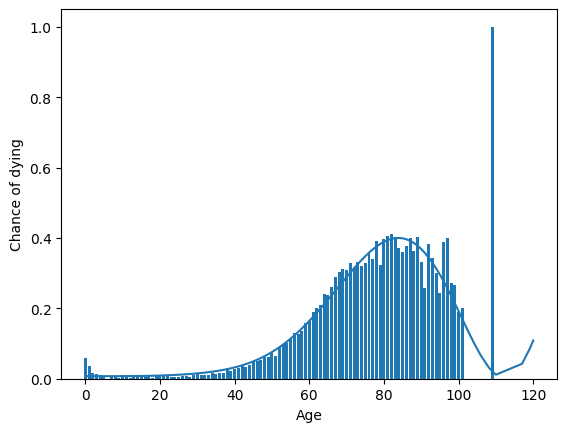

Text(0, 0.5, 'Chance of dying')

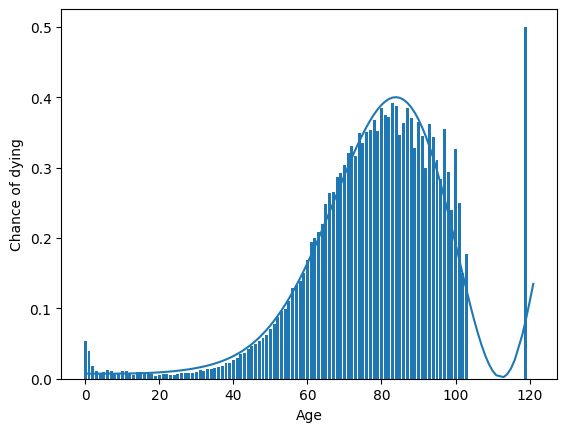

In [33]:
lin = LinearRegression()
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(probx_train.reshape(-1,1))
lin.fit(X_poly, proby_train)

X_poly_test = poly.fit_transform(probx_test.reshape(-1,1))

plt.plot(probx_test, lin.predict(X_poly_test))
plt.bar(probx_test, proby_test)
plt.xlabel("Age")
plt.ylabel("Chance of dying")
plt.show()

plt.bar(probx_train, proby_train)
plt.plot(probx_train, lin.predict(X_poly))
plt.xlabel("Age")
plt.ylabel("Chance of dying")

0.0010498165386666118


<BarContainer object of 121 artists>

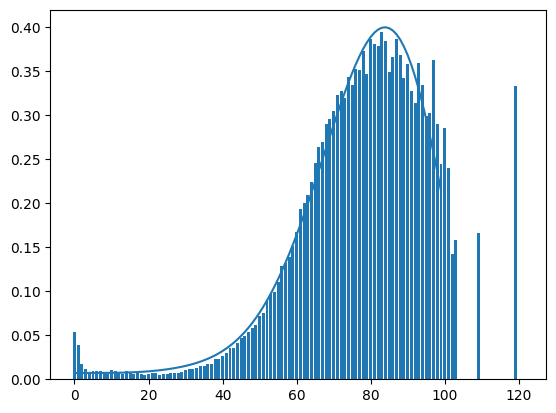

In [34]:
pred = lin.predict(X_poly_test)
length = len(pred)
X_true, ans = MakeArray(chance_dying)
print(MSE(ans[:length], pred))


length = 100
X_poly_true = poly.fit_transform(X_true.reshape(-1,1))
plt.plot(X_true[:length], lin.predict(X_poly_true[:length]))
plt.bar(X_true, ans)

Now testing for different sample sizes 

MSE for sample size 1000 is: 0.049996365109225636
MSE for sample size 10000 is: 0.001446578924382999
MSE for sample size 20000 is: 0.0013905536145723282
MSE for sample size 50000 is: 0.001099591369903275
MSE for sample size 100000 is: 0.008796385925064867
MSE for sample size 200000 is: 0.0006860650125722906
MSE for sample size 500000 is: 0.000980808965142211


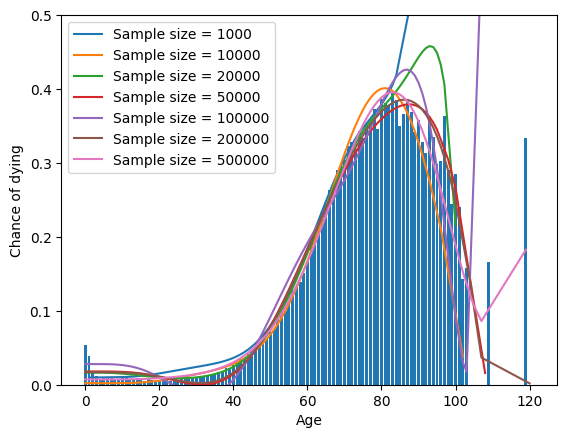

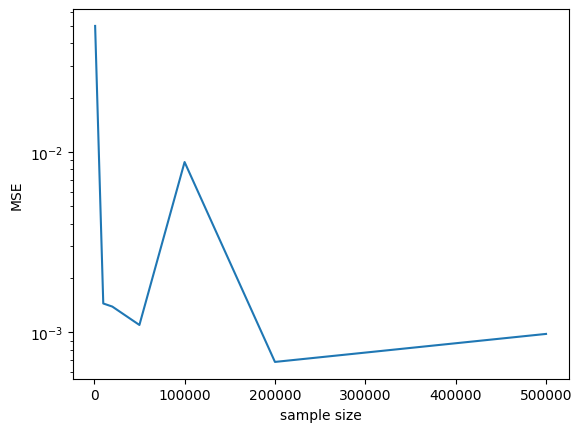

In [35]:

X_true, ans = MakeArray(chance_dying)

M_list1 = [1000,10000,20000,50000,100000,200000,500000]

mse_arr = np.zeros(len(M_list1))
bootstrap_iter = 10

for i,M in enumerate(M_list1):
    Age = X[:,6]
    
    #Shuffling data because it seems not random enough for good resampling
    new_Age, new_Y = shuffle(Age,Y)

    #M = len(Age) #chosen number of data points
    n = len(Age)
    m = int(n/M)
    random_index = np.random.randint(m)*M   
    new_Age = new_Age[random_index:random_index+M]
    new_Y = new_Y[random_index:random_index+M]

    Age_train, Age_test, YA_train, YA_test = train_test_split(new_Age, new_Y, test_size=0.2)

    deaths_train = ChanceDying(Age_train, YA_train)
    probx_train, proby_train = MakeArray(deaths_train)

    deaths_test = ChanceDying(Age_test, YA_test)
    probx_test, proby_test = MakeArray(deaths_test)

    lin = LinearRegression()
    poly = PolynomialFeatures(degree=10)
    X_poly = poly.fit_transform(probx_train.reshape(-1,1))
    lin.fit(X_poly, proby_train)

    X_poly_test = poly.fit_transform(probx_test.reshape(-1,1))
    pred = lin.predict(X_poly_test)
    plt.plot(probx_test, pred, label=f"Sample size = {M}")
    
    mse = MSE(ans[:len(pred)], pred)
    print(f"MSE for sample size {M} is:",mse)
    mse_arr[i] = mse
    #length = 100
    #X_poly_true = poly.fit_transform(X_true.reshape(-1,1))
    #plt.plot(X_true[:length], lin.predict(X_poly_true[:length]))
    

plt.legend()
plt.ylim(0,0.5)
plt.xlabel("Age")
plt.ylabel("Chance of dying")
plt.bar(X_true, ans)
plt.savefig("../figures/chance_of_dying_differentSamples")
plt.show()

plt.plot(M_list1, mse_arr)
plt.ylabel("MSE")
plt.xlabel("sample size")
plt.yscale('log')
plt.savefig("../figures/MSE_Chance_dying")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


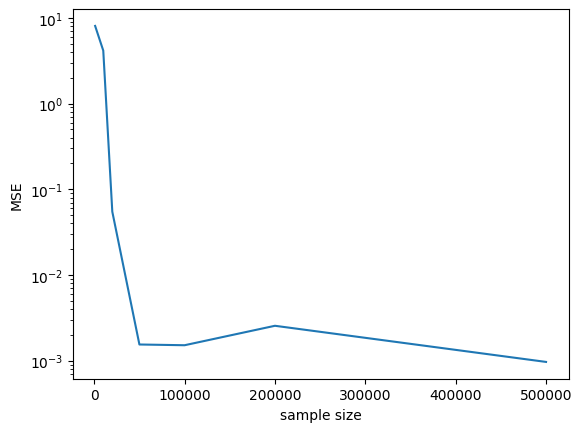

In [36]:
mse_arr = np.zeros(len(M_list1))
bootstrap_iter = 20


for _ in range(bootstrap_iter):
    print(_)
    for i,M in enumerate(M_list1):
        Age = X[:,6]
        
        #Shuffling data because it seems not random enough for good resampling
        new_Age, new_Y = shuffle(Age,Y)

        #M = len(Age) #chosen number of data points
        n = len(Age)
        m = int(n/M)
        random_index = np.random.randint(m)*M   
        new_Age = new_Age[random_index:random_index+M]
        new_Y = new_Y[random_index:random_index+M]

        Age_train, Age_test, YA_train, YA_test = train_test_split(new_Age, new_Y, test_size=0.2)

        deaths_train = ChanceDying(Age_train, YA_train)
        probx_train, proby_train = MakeArray(deaths_train)

        deaths_test = ChanceDying(Age_test, YA_test)
        probx_test, proby_test = MakeArray(deaths_test)

        lin = LinearRegression()
        poly = PolynomialFeatures(degree=10)
        X_poly = poly.fit_transform(probx_train.reshape(-1,1))
        lin.fit(X_poly, proby_train)

        X_poly_test = poly.fit_transform(probx_test.reshape(-1,1))
        pred = lin.predict(X_poly_test)
        
        mse = MSE(ans[:len(pred)], pred)
        mse_arr[i] += mse

mse_arr /= bootstrap_iter
plt.plot(M_list1, mse_arr)
plt.ylabel("MSE")
plt.xlabel("sample size")
plt.yscale('log')
plt.savefig("../figures/MSE_Chance_dying_bootstrap")

Looking at the MSE for sample sizes, it seems about 50 000 samples is enough to justify a good enough MSE.
We can also see this on the lines plot, where the red curve seems well fitted to our actual data.

We now do the same but compare to to the actual input data as a prediction:

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


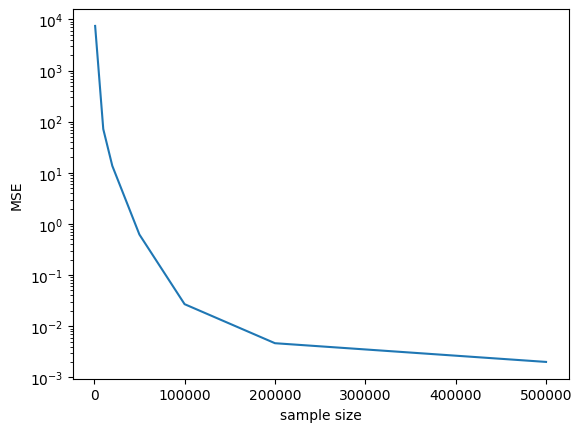

In [37]:
mse_arr = np.zeros(len(M_list1))
bootstrap_iter = 20


for _ in range(bootstrap_iter):
    print(_)
    for i,M in enumerate(M_list1):
        Age = X[:,6]
        
        #Shuffling data because it seems not random enough for good resampling
        new_Age, new_Y = shuffle(Age,Y)

        #M = len(Age) #chosen number of data points
        n = len(Age)
        m = int(n/M)
        random_index = np.random.randint(m)*M   
        new_Age = new_Age[random_index:random_index+M]
        new_Y = new_Y[random_index:random_index+M]


        deaths_train = ChanceDying(new_Age, new_Y)
        probx_train, proby_train = MakeArray(deaths_train)

        deaths_test = ChanceDying(Age, Y)
        probx_test, proby_test = MakeArray(deaths_test)

        lin = LinearRegression()
        poly = PolynomialFeatures(degree=10)
        X_poly = poly.fit_transform(probx_train.reshape(-1,1))
        lin.fit(X_poly, proby_train)

        X_poly_test = poly.fit_transform(probx_test.reshape(-1,1))
        pred = lin.predict(X_poly_test)
        
        mse = MSE(ans, pred)
        mse_arr[i] += mse

mse_arr /= bootstrap_iter
plt.plot(M_list1, mse_arr)
plt.ylabel("MSE")
plt.xlabel("sample size")
plt.yscale('log')
plt.savefig("../figures/MSE_Chance_dying_bootstrap_FULLDATA")

We see when comparing to actual data as a test, we need about 100-200 000 samples to make a good enough estimate where we can 
be content with our prediction.

We now look at the percentage of death by age combined with another of the features. The feature we choose is diabetes, because it is not clear wether or not it plays a role in the death rate or not.

## Study of how diabetes plays a role in death rate

In [38]:
Age = X[:,6]
Diabetes = X[:,8]
Diabetes = np.where(Diabetes == 2, 0, 1)
print(Diabetes)

[0 0 0 ... 0 0 1]


In [39]:
def ChanceDying_diabetes(Age, Diabetes,Y):
    ages = np.unique(X)
    diabetes = {i:0 for i in ages}
    diabetes_dead = {i:0 for i in ages}
    for i in range(len(Y)):
        diabetes[Age[i]] += Diabetes[i]
        diabetes_dead[Age[i]] += Diabetes[i]*Y[i]


    for key in diabetes_dead:
        if diabetes[key] > 0:
            diabetes_dead[key] /= diabetes[key]

    return diabetes_dead

def MakeArray(dict):
    length = len(dict)
    x_arr = np.zeros(length)
    y_arr = np.zeros(length)

    for i,key in enumerate(dict):
        x_arr[i] = key 
        y_arr[i] = dict[key]

    return x_arr, y_arr

deaths_diabetes = ChanceDying_diabetes(Age, Diabetes, Y)
deaths_age = ChanceDying(Age, Y)


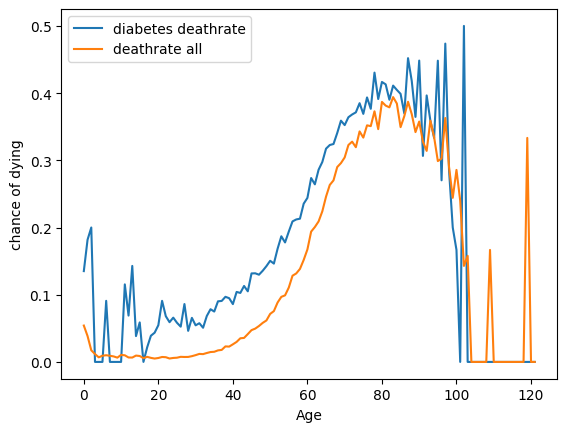

In [40]:

X_diabetes, Y_diabetes = MakeArray(deaths_diabetes)
X_age, Y_age = MakeArray(deaths_age)
plt.plot(X_diabetes, Y_diabetes, label="diabetes deathrate")
plt.plot(X_age, Y_age, label="deathrate all")
plt.xlabel("Age")
plt.ylabel("chance of dying")
plt.legend()
plt.savefig("../figures/death_rate_diabetes_vs_all")

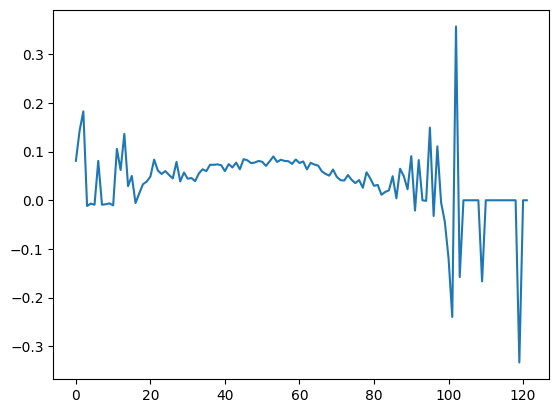

In [41]:
#Plotting difference in deathrate for diabetes vs all features
plt.plot(X_age, (Y_diabetes - Y_age))
